# 605.621 - Foundations of Algorithms

## The Maximal Clique Problem

Sabbir Ahmed

May 11, 2021

# Table of contents

- [Introduction](#introduction)
  - [Background](#background)
  - [Applications](#applications)
  - [Algorithm](#algorithm)
- [Complexity Analysis](#complexity-analysis)
  - [Time complexity](#time-complexity)
  - [Space complexity](#space-complexity)
- [Empirical Analysis](#empirical-analysis)
  - [Data analysis](#data-analysis)
- [Conclusion](#conclusion)
- [References](#references)

## Introduction <a class="anchor" id="introduction"></a>

### Background <a class="anchor" id="background"></a>

According to graph theory, a __graph__ can be defined simply as a set of objects (called __nodes__ or vertices) connected together through __edges__. [\[1\]](#references)

A __clique__ of a graph $G$ is a complete subgraph of $G$ such that every two distinct nodes in the clique are adjacent. A __maximal clique__ is a clique that cannot be extended by including one more adjacent nodes [\[2\]](#references).

Consider the following graph:

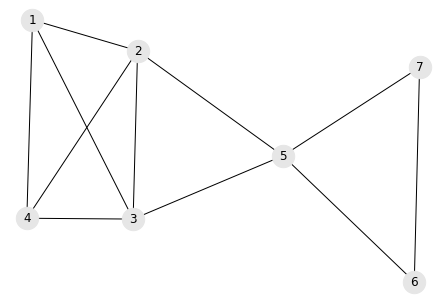

In [1]:
import random

# import library for constructing and displaying graphs
import networkx as nx
import numpy as np

seed = 0
random.seed(seed)
np.random.seed(seed)

def draw_graph(G, pos, node_color="0.9"):
    nx.draw(G, pos=pos, node_color=node_color, node_size=500, with_labels=True)

G = nx.Graph()  # instantiate an empty graph
G.add_nodes_from(range(1, 8))  # add 7 nodes
# connect the nodes
G.add_edges_from([
    [1, 2], [1, 3],
    [1, 4], [2, 3],
    [2, 4], [2, 5],
    [3, 4], [3, 5],
    [5, 6], [5, 7],
    [6, 7]
])

# save the x,y coordinates of the graphical representation of the graph to overlay subgraphs in the later cells
pos = nx.spring_layout(G, seed=seed)
# use networkx to draw the graph constructed
draw_graph(G, pos)

In [2]:
print(f"Graph G has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

Graph G has 7 nodes and 11 edges


For convenience, we begin searching for a clique from the less crowded areas of the graph, nodes 5-6-7.

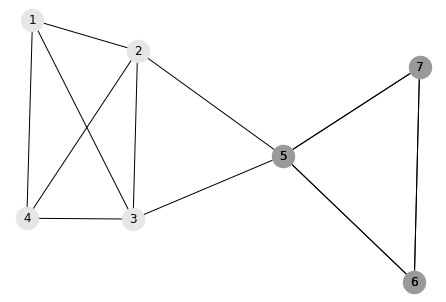

In [3]:
draw_graph(G, pos)
draw_graph(G.subgraph([5, 6, 7]), pos=pos, node_color="0.6")

Those nodes form a closed triangular supgraph and each of the nodes except 5 have two neighbors (2, 3). A __neighbor__ of a node is a node that is connected by at least one edge. The triangular subgraph 5-6-7 is a clique because each of the nodes are neighbors of each other. The clique is maximal because even if vertex 5 has additional neighbors, extending the subgraph to vertex 2, for example, would not make the node neighbors of 6 or 7. The clique is maximal because it cannnot be extended further.

The next set of nodes to observe are the closed triangular subgraph 2-3-5.

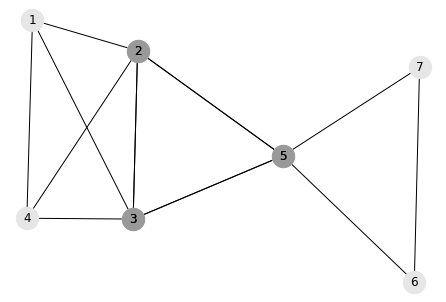

In [4]:
draw_graph(G, pos)
draw_graph(G.subgraph([2, 3, 5]), pos=pos, node_color="0.6")

For the same reasons as 5-6-7, this subgraph cannot be extended with neighbors of certain nodes. Therefore, 2-3-5 is also a maximal clique.

The final set of nodes are 1-2-3-4 that form a closed rectangular subgraph.

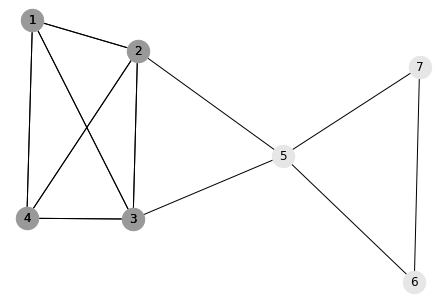

In [5]:
draw_graph(G, pos)
draw_graph(G.subgraph([1, 2, 3, 4]), pos=pos, node_color="0.6")

We observe that each of the nodes are neighbors of each other, i.e. traversing between any two nodes in the subgraph takes a single iteration. This clique is maximal because it cannot be extended further by including other nodes. This maximal clique is also known as the __maximum clique__ of graph $G$ because it contains the maximum number of nodes among all the maximal cliques.

### Applications <a class="anchor" id="applications"></a>

The maximal clique problem has uses in the fields of chemistry, biology, and bioinformatics. Algorithms to enumerate maximal cliques have been used to find chemicals that match a target structure [\[3\]](#references) and to model molecular docking and the binding sites of chemical reactions [\[4\]](#references). Clique-finding algorithms have been used to infer evolutionary trees, [\[5\]](#references) predict protein structures, [\[6\]](#references) and find closely interacting clusters of proteins. [\[7\]](#references)

The algorithms have also been used in mathematical modeling. Lagarias & Shor (1992) used a clique-finding algorithm on an associated graph to find a counterexample to disprove Keller's conjecture on face-to-face tiling of hypercubes. [\[8\]](#references)

### Algorithm <a class="anchor" id="algorithm"></a>

Finding the maximum number of cliques is a problem that can scale exponentially since there exist graphs with exponentially many maximal cliques. A polynomial time is often not possible if a brute-force approach is taken to find all the cliques. Several algorithms exist to enumerate all the maximal cliques in a graph, including the [Bron–Kerbosch algorithm](https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm) which performs in $O(3^{n/3})$ time, matching the maximum number of cliques possible in an $n$-node graph. [\[9\]](#references)

```
Bron-Kerbosch(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    for each vertex v in P do
        Bron-Kerbosch(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P = P \ {v}
        X = X ⋃ {v}
```

The cliques have to be stored in memory and preserved through the recursive calls. A list variable can be passed in the recursive functions to store the cliques. An additional variable can also be included to count the number of recursions per algorithm.

In [6]:
class RecursionReporter():

    def __init__(self, N):
        """Helper class to keep track of attributes of the recursive functions

        Params:
            N <networkx.classes.graph.Graph method>: list of neighbors returned as adjacency lists
        """
        # assign the list of neighbors in the graph to a member variable to
        # avoid passing it every call
        self.N = N

        # list of maximal cliques found
        self.cliques = []

        # number of recursive calls made
        self.num_recursions = 0

    def inc(self):
        """Increment the number of recursive calls made"""
        self.num_recursions += 1

    def append(self, clique):
        """Add maximal clique to the list of cliques
        
        Params:
            clique <set(int)>: set of nodes representing a clique
        """
        self.cliques.append(clique)

    def report_agg(self):
        """Report the aggregated statistics"""
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Total number of cliques found: {len(self.cliques)}")

    def report(self):
        """Report the aggregated statistics and list out all the cliques found"""
        self.report_agg()
        for clique in self.cliques:
            print(clique)

In [7]:
def bron_kerbosch(R, P, X, reporter):
    """Naive Bron–Kerbosch algorithm

    Params:
        R <set(int)>: the clique found
        P <set(int)>: one of the disjoint sets whose union consists of those vertices that form
                      cliques when added to `R`. This set begins as the vertex set of the graph
        X <set(int)>: one of the disjoint sets whose union consists of those vertices that form
                      cliques when added to `R`. This set begins as an empty set.
        reporter <RecursionReporter>: class object to trace metrics and preserved data from the
                                      recursive calls
    """
    # increment the number of recursive calls
    reporter.inc()
    if not P and not X:
        reporter.append(R)

    for v in list(P):
        bron_kerbosch(R | {v}, P & set(reporter.N(v)), X & set(reporter.N(v)), reporter)
        P.remove(v)
        X.add(v)

In [8]:
reporter = RecursionReporter(G.neighbors)
bron_kerbosch(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 26
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


The naive Bron Kerbosch algorithm is however not very efficient with many non-maximal cliques. The algorithm makes a recursive call for every clique, maximal or not. A variation of the algorithm exists with a pivot vertex to more quickly backtrack in branches of the search that contain no maximal cliques.

```
Bron-Kerbosch-Pivot(R, P, X)
    if P and X are both empty then
        report R as a maximal clique
    choose a pivot vertex u in P ⋃ X
    for each vertex v in P \ N(u) do
        Bron-Kerbosch-Pivot(R ⋃ {v}, P ⋂ N(v), X ⋂ N(v))
        P := P \ {v}
        X := X ⋃ {v}
```

In [9]:
def _pop(s):
    """Pop from the set `s`

    This utility function is utilized in choosing "any" vertex from a set. In
    this notebook, only unions, intersections and differences of sets are
    inputted. Popping from those sets do not affect the original sets.

    Args:
        s <set(int)>: set of integer nodes

    Returns:
        e <int>: node popped from set
    """
    for e in s:
        break
    return e


def bron_kerbosch_pivot(R, P, X, reporter):
    """Bron–Kerbosch algorithm with pivot

    Params:
        R <set(int)>: the clique found
        P <set(int)>: one of the disjoint sets whose union consists of those vertices that form
                      cliques when added to `R`. This set begins as the vertex set of the graph
        X <set(int)>: one of the disjoint sets whose union consists of those vertices that form
                      cliques when added to `R`. This set begins as an empty set.
        reporter <RecursionReporter>: class object to trace metrics and preserved data from the
                                      recursive calls
    """
    # increment the number of recursive calls
    reporter.inc()
    if not P and not X:
        reporter.append(R)
        return

    # some vertex in P | X
    pivot = _pop(P | X)

    # for every nodes
    for v in list(P - set(reporter.N(pivot))):
        bron_kerbosch_pivot(R | {v}, P & set(reporter.N(v)), X & set(reporter.N(v)), reporter)
        P.remove(v)
        X.add(v)

In [10]:
reporter = RecursionReporter(G.neighbors)
bron_kerbosch_pivot(set(), set(G.nodes()), set(), reporter)
reporter.report()

Total number of recursive calls: 13
Total number of cliques found: 3
{1, 2, 3, 4}
{2, 3, 5}
{5, 6, 7}


## Complexity Analysis <a class="anchor" id="complexity-analysis"></a>

For this project, only the version of the Bron Kerbosch algorithm with pivoting will be analyzed. Consider the breakdown of the function with their individual time complexities:

```
def bron_kerbosch_pivot(R, P, X):
    if not P and not X:                     # O(1)
        print(R)                            # O(1)
        return

    pivot = pop(P | X)                      # O(|P|+|X|)

    P1 = P - set(N(pivot))                  # O(|P|)
    P1 = list(P1)                           # O(|P|)
    for v in P1:                            # O(|P|)
        R1 = R | {v}                        # O(|R|)
        P2 = P & set(N(v))                  # O(min(|P|,|N|))
        X1 = X & set(N(v))                  # O(min(|X|,|N|))
        bron_kerbosch_pivot(R1, P2, X1)     # O(1)
        P.remove(v)                         # O(1)
        X.add(v)                            # O(1)
```

### Time complexity <a class="anchor" id="time-complexity"></a>

The depth of the recursion tree increases depending on the number of nodes per each sets $R$, $P$ and $X$. As mentioned earlier, the maximum number of maximal cliques in a graph of $n$ nodes is $3^{n/3}$, which is the worst case runtime of this algorithm.

### Space complexity <a class="anchor" id="space-complexity"></a>

The worst case space complexity of the algorithm is:

$O(|P|\cdot max(min(|P|,|N|), min(|X|,|N|)))$

Since on average $|P| \approx |X| \approx |N|$, the complexity can be simplified to $O(n^2)$.

## Empirical Analysis <a class="anchor" id="empirical-analysis"></a>

In order to measure the performance of the algorithm, several utility functions are required. We can expand on the `RecursionReporter` class by adding methods to generate random graphs and other statistics.

In [11]:
class GraphGenerator(RecursionReporter):

    def __init__(self, n):
        """Generate a random undirected graph of `n` nodes and `n` < x < `n` * 5 edges and
        provide methods to find all the maximal and maximum cliques.

        Params:
            n <int>: number of nodes for the random graph
        """
        # number of nodes in the graph
        self.n = n

        # generate a random number between n and 5n
        self.e = np.random.randint(self.n, self.n * 5)

        # generate a random graph of n nodes and e edges
        self.G = nx.gnm_random_graph(self.n, self.e)

        # save the neighbor nodes as a member variable
        self.N = self.G.neighbors

        # call the superclass constructor
        super(GraphGenerator, self).__init__(self.N)

    def gen_stats(self):
        """Compute the total number and lengths of maximal and maximum cliques"""
        self.num_cliques = len(self.cliques)
        self.nodes_rec_ratio = self.n / self.num_recursions
        self.cliques_rec_ratio = self.num_cliques / self.num_recursions

    def report(self):
        """Report the statistics and list all the cliques found"""
        print(f"Total number of recursive calls: {self.num_recursions}")
        print(f"Number of recursions to nodes ratio: {self.nodes_rec_ratio}\n")
        print(f"Number of cliques to recursions ratio: {self.cliques_rec_ratio}\n")
        print(f"Total number of cliques found: {self.num_cliques}")
        print("Maximal cliques found:")
        for clique in self.cliques:
            print(clique)

Testing out the class constructed:

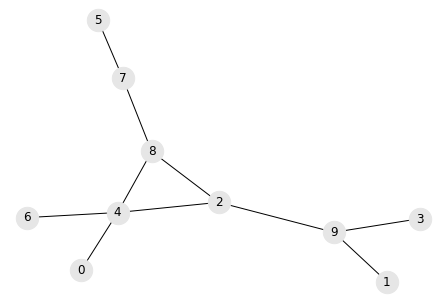

In [12]:
gg = GraphGenerator(10)
nx.draw(gg.G, node_color="0.9", node_size=500, with_labels=True)

In [13]:
bron_kerbosch_pivot(set(), set(gg.G.nodes()), set(), gg)

In [14]:
gg.gen_stats()
gg.report()

Total number of recursive calls: 19
Number of recursions to nodes ratio: 0.5263157894736842

Number of cliques to recursions ratio: 0.42105263157894735

Total number of cliques found: 8
Maximal cliques found:
{0, 4}
{1, 9}
{8, 2, 4}
{9, 2}
{9, 3}
{5, 7}
{4, 6}
{8, 7}


Now, statistics can be generated on the number of recursions as the size of the graph increases.

The following loop will generate 50 random graphs of 10, 100, 1000, 10000, and 100000 nodes. The loop takes about 4 minutes of wall time to terminate.

In [15]:
%%time

# lists to store graph variables
num_cliques = []
num_edges = []
num_recursions = []
nodes_rec_ratios = []
cliques_rec_ratios = []
num_nodes_list = range(1, 6)
for i in num_nodes_list:

    # scale number of nodes exponentially
    num_nodes = 10**i

    # temporary lists
    _num_cliques = []
    _num_edges = []

    _num_recursions = []
    _nodes_rec_ratios = []
    _cliques_rec_ratios = []

    # generate 50 graphs of `n` nodes
    for _ in range(50):

        # generate a new graph generator
        gg = GraphGenerator(num_nodes)
        bron_kerbosch_pivot(set(), set(gg.G.nodes()), set(), gg)
        gg.gen_stats()

        # save each of the graph generator attributes to the temporary lists
        _nodes_rec_ratios.append(gg.nodes_rec_ratio)
        _cliques_rec_ratios.append(gg.cliques_rec_ratio)

        # take log10 of exponentially increasing variables and append to the temporary lists
        _num_recursions.append(np.log10(gg.num_recursions))
        _num_cliques.append(np.log10(gg.num_cliques))
        _num_edges.append(np.log10(gg.e))

    # append the temporary lists to the global lists
    num_cliques.append(_num_cliques)
    num_edges.append(_num_edges)

    num_recursions.append(_num_recursions)
    nodes_rec_ratios.append(_nodes_rec_ratios)
    cliques_rec_ratios.append(_cliques_rec_ratios)

CPU times: user 3min 58s, sys: 1.88 s, total: 4min
Wall time: 4min


### Data Analysis <a class="anchor" id="data-analysis"></a>

Plotting the statistics by first importing the visualization libraries:

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid")


def plot_bp_mean_line(ydata, title, ylabel):
    """Plot a seaborn.boxplot of `ydata` and a seaborn.lineplot of the means of the
    sublists of `ydata`

    Params:
        ydata <list(list(float))>: list of list of HraphGenerator attribute values
        title <str>: title of the plot figure
        ylabel <str>: label of the Y-axis of the figure
    """
    fig = plt.figure(figsize=(12, 8), dpi=120)

    # generate boxplots of ydata
    sns.boxplot(data=ydata, palette=sns.color_palette("Set2"))

    # generate a line plot of the mean of ydata
    sns.lineplot(data=[np.mean(i) for i in ydata], marker="o", color="gray")

    plt.xlabel("Number of nodes (10^n)")
    plt.ylabel(ylabel)
    plt.xticks(plt.xticks()[0], num_nodes_list)
    plt.legend(labels=["Mean"])
    plt.title(title)

Visualizing the log-log relationship between the number of nodes in a graph with the number of recursive calls made by the clique searching algorithm:

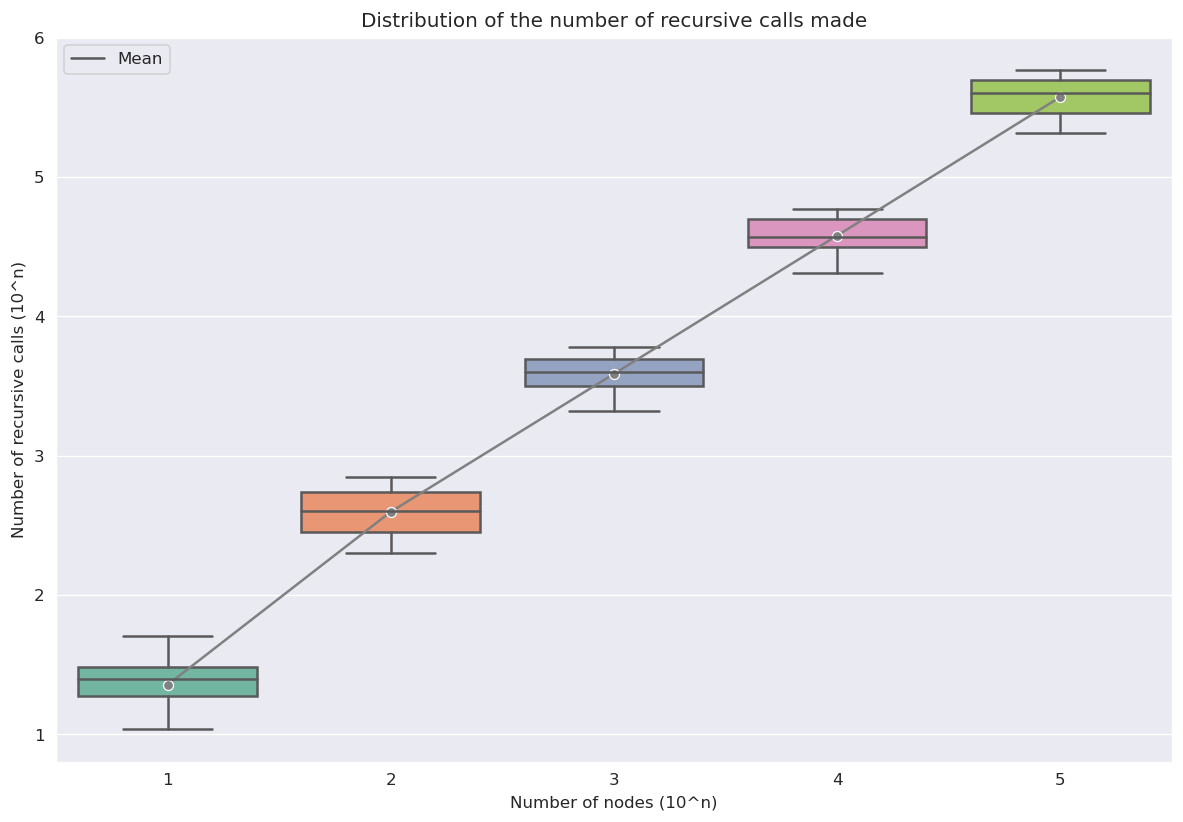

In [17]:
plot_bp_mean_line(
    ydata=num_recursions,
    title="Distribution of the number of recursive calls made",
    ylabel="Number of recursive calls (10^n)"
)

It can be observed that there is a linear relationship between the number of nodes in a graph and the number of recursive calls made.

Normalizing by computing the ratios of the number of nodes to the number of recursive calls yields interesting results.

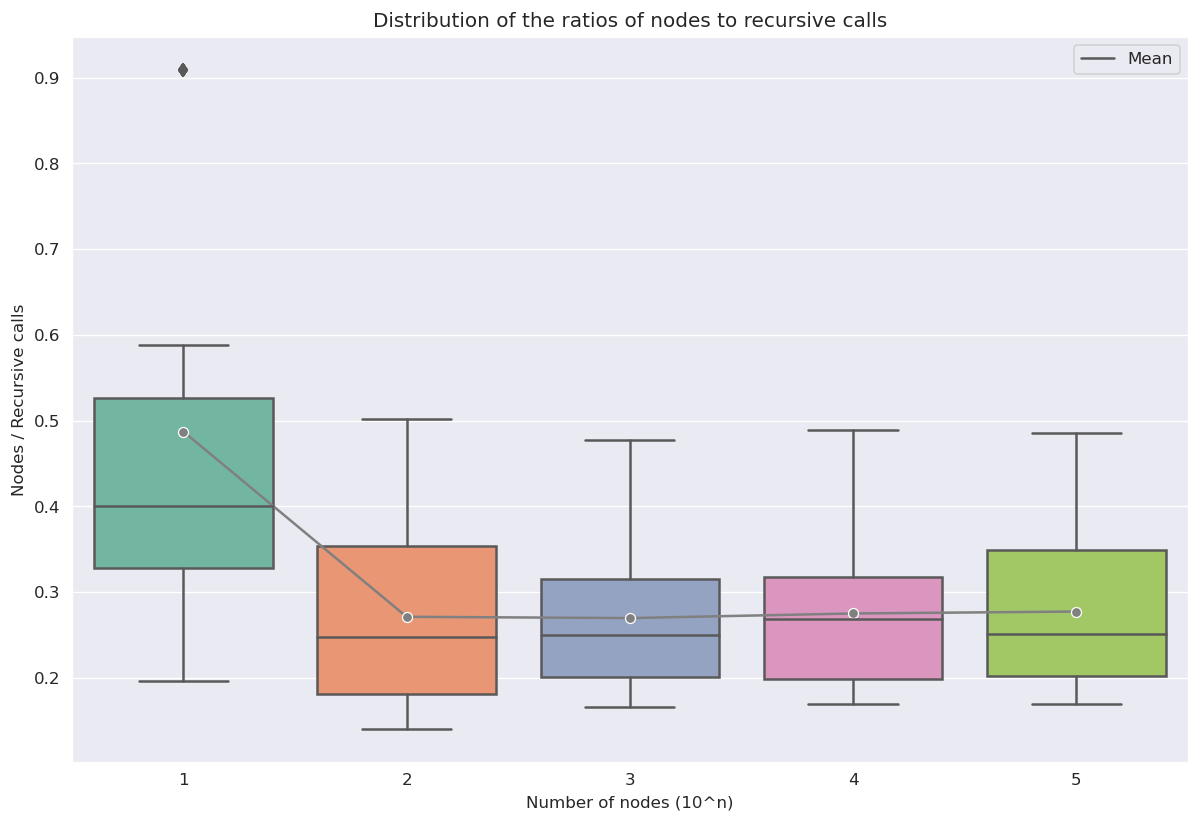

In [18]:
plot_bp_mean_line(
    ydata=nodes_rec_ratios,
    title="Distribution of the ratios of nodes to recursive calls",
    ylabel="Nodes / Recursive calls"
)

It appears that the rate of recursive calls to nodes is significantly lower in graphs with 10 nodes than those with a larger magnitude. This relationship would suggest that smaller graphs require lesser number of recursive calls to enumerate all cliques; e.g. a ratio of 1 indicates one recursive call per node and is a much better performance than a rate of 0.5 nodes per recursive calls.

However, computing a ratio of the number of recursive calls to the number of cliques found yield a better metric to gauge the efficiency, since the number of cliques possible in a graph sets the bound for the runtime on the Bron-Kerbosch algorithm. A ratio of 1 indicates that each recursive call was used efficiently to find one clique.

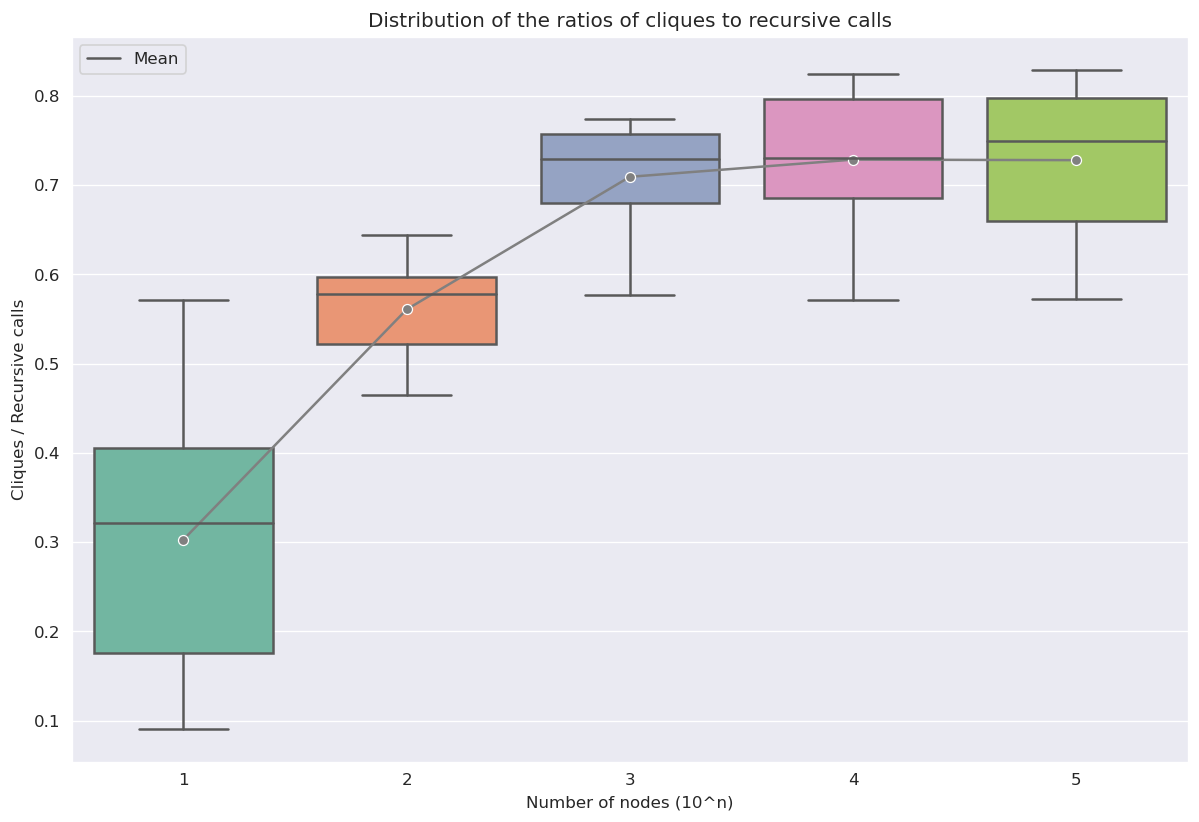

In [19]:
plot_bp_mean_line(
    ydata=cliques_rec_ratios,
    title="Distribution of the ratios of cliques to recursive calls",
    ylabel="Cliques / Recursive calls"
)

Although graphs with 10 nodes had lesser number of recursive calls to the number of nodes, they did not use those calls as efficiently as the larger graphs.

## Conclusion

The Bron-Kerbosch algorithm was developed and improved upon over several years of research. The version with the pivoting performs better than the original by reducing the number of recursive calls. A lower number of recursive calls is always preferred, especially for large graphs that may push to a maximum recursion depth. The algorithm has also been observed to perform more efficiently for larger graphs with more efficient recursive calls.

## References <a class="anchor" id="references"></a>

[1] “Directed and Undirected Graphs.” Directed and Undirected Graphs - MATLAB &amp; Simulink, www.mathworks.com/help/matlab/math/directed-and-undirected-graphs.html.

[2] “Clique.” From Wolfram MathWorld, mathworld.wolfram.com/Clique.html. 

[3] CLIP:  Similarity Searching of 3D Databases Using Clique Detection
Nicholas Rhodes, Peter Willett, Alain Calvet, James B. Dunbar, and Christine Humblet
Journal of Chemical Information and Computer Sciences 2003 43 (2), 443-448
DOI: 10.1021/ci025605o

[4] Kuhl, F.S., Crippen, G.M. and Friesen, D.K. (1984), A combinatorial algorithm for calculating ligand binding. J. Comput. Chem., 5: 24-34. https://doi.org/10.1002/jcc.540050105

[5] William H. E. Day, & Sankoff, D. (1986). Computational Complexity of Inferring Phylogenies by Compatibility. Systematic Zoology, 35(2), 224-229. doi:10.2307/2413432

[6] Kuhl, F. S.; Crippen, G. M.; Friesen, D. K. (1983), "A combinatorial algorithm for calculating ligand binding", Journal of Computational Chemistry, 5 (1): 24–34, doi:10.1002/jcc.540050105.

[7] Spirin, Victor; Mirny, Leonid A. (2003), "Protein complexes and functional modules in molecular networks", Proceedings of the National Academy of Sciences, 100 (21): 12123–12128, Bibcode:2003PNAS..10012123S, doi:10.1073/pnas.2032324100.

[8] Lagarias, J. C., &amp; Shor, P. W. (1992, January 1). Keller's cube-tiling conjecture is false in high dimensions. American Mathematical Society. https://www.ams.org/journals/bull/1992-27-02/S0273-0979-1992-00318-X/home.html.

[9] Moon, J., & Moser, L. (1965). On cliques in graphs. Israel Journal of Mathematics, 3, 23-28.